In [17]:
from google.colab import drive
drive.mount('/content/drive')
#from drive import nt_toolbox
#from nt_toolbox.general import *
#from nt_toolbox.signal import *
import numpy as np
import random as r
from pylab import array
%pylab inline
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import random as r
from timeit import default_timer as timer

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['convolve']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Model training

In [18]:
import pandas as pd
data= pd.read_csv('/content/drive/My Drive/Colab Notebooks/nt_toolbox/data/diabetes.csv',sep=" ", header=None)
print(data.shape)
data.head() # Preview Data

(768, 10)


,0,1,2,3,4,5,6,7,8,9
0,-1,NaN,6.0,148.0,72.0,35.0,0.0,33.599998,0.627,50.0
1,1,NaN,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0
2,-1,NaN,8.0,183.0,64.0,0.0,0.0,23.299999,0.672,32.0
3,1,NaN,1.0,89.0,66.0,23.0,94.0,28.100000,0.167,21.0
4,-1,NaN,0.0,137.0,40.0,35.0,168.0,43.099998,2.288,33.0


In [0]:
diabetes = '/content/drive/My Drive/Colab Notebooks/nt_toolbox/data/diabetes.csv'
data=np.loadtxt(diabetes, unpack=True)

### Subgradient descent method

In [0]:
#Converting the data to X and Y
A=np.transpose(data[1:])[0:500]
#print(A)
(n,m)=A.shape
Y=np.transpose(data[0])[0:500]
#print(A.shape)
T=[[0 for x in range(m+1)] for y in range(n)]
X=np.array(T)
#print(X.shape)
#print(X[1][:].shape)
for i in range(n):
    for j in range(m):
        X[i][j]=A[i][j]
for i in range(n):
    X[i][m]=1
#print(X)

In [0]:
#Choosing a subgradient
def subdiff(w,matrix,u,col):
    (n,m)= matrix.shape
    v=0.00000001*w
    for i in range(n):
        c = col[i]*np.matmul(np.transpose(w),matrix[i][:])
        if (1-c)<0:
            u=np.zeros(m)
        elif (1-c)>0:
            u=-col[i]*np.transpose(matrix[i][:])
        else:
            u=-r.randrange(-1,1)*col[i]*np.transpose(matrix[i][:])
        v +=1/n*u
    return v

In [0]:
def fvalue(matrix,col,w):
    (n,m)=matrix.shape
    v=0.00000001/2*np.linalg.norm(w,ord=2)**2
    for i in range(n):
        v += 1/n*max(0, 1-col[i]*np.matmul(np.transpose(w),matrix[i][:]))
    return v

In [0]:
## Subgradient descent method
def regress(matrix,col):
    (n,m)= matrix.shape
    u = [1 for i in range (m)]
    w = np.ones(m)
    fbest=100*np.ones(1001)
    a=np.ones(m)
    value=np.ones(1000)
    for i in range(1000):
        v=subdiff(w,matrix,u,col) #choose a subgradient
        w += -1/(np.linalg.norm(v,ord=2)*np.sqrt(i+1))*v# x^{k+1}=x^k-f(x^k)/(norm(v)^2)*v
        value[i]=fvalue(X,Y,w) #compute f(x^{k+1})
        if value[i]<fbest[i]:#store fbest
            fbest[i+1]=value[i]
            a+=-a+w
        else:
            fbest[i+1]=fbest[i]
    return (a, w, value, fbest)

time= 6.775419491999969
value= [79.05017572 28.81630101 15.03647004 23.35143997 11.44737258 20.57955624
  9.70775103 18.76476485  8.6609461  17.47721735  7.98120199 16.46263659
  7.47966344 15.63630006  7.0832669  14.92475888  6.75838398 14.28961702
  6.4825063  13.72206414  6.23929474 13.20233672  6.02277633 12.72475066
  5.82654799 12.28491211  5.64743892 11.86830682  5.48349058 11.49825422
  5.33302561 11.1364588   5.19440846 10.80844745  5.06306995 10.50826803
  4.94152831 10.24409964  4.82603959 10.0001118   4.71766196  9.77234231
  4.61557534  9.55877295  4.51854076  9.35648486  4.42685729  9.17181936
  4.34039651  8.99086481  4.25748589  8.82254919  4.1787205   8.65994459
  4.10402222  8.51060793  4.03276027  8.36433909  3.96400482  8.22731577
  3.8985127   8.09589938  3.83588568  7.97146618  3.77512424  7.85096048
  3.7165187   7.73505647  3.6599283   7.62472806  3.60586311  7.52076732
  3.55357153  7.4208477   3.50279638  7.32302276  3.45379363  7.23076055
  3.40662207  7.1420

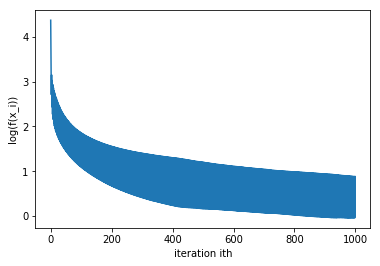

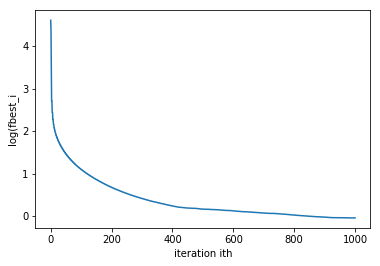

In [24]:
start = timer()
(wbest,gdm,value, fbest)=regress(X,Y)
end = timer()
print('time=',end - start)
#print('x=',x)
print('value=',value)
print('fbest=',fbest)
import matplotlib.pyplot as plt
plt.plot(np.log(value))
plt.xlabel('iteration ith')
plt.ylabel('log(f(x_i))')
plt.show()
plt.plot(np.log(fbest))
plt.xlabel('iteration ith')
plt.ylabel('log(fbest_i')
plt.show()

### Stochastic subgradient descent method

In [0]:
def subdiffsto(w,matrix,col):
    (n,m)=X.shape
    c = col*np.matmul(np.transpose(w),matrix)
    if (1-c)<0:
        u=np.zeros(m)
    elif (1-c)>0:
        u=-col*np.transpose(matrix)
    else:
        u=-r.randrange(-1,1)*col*np.transpose(matrix)
    v =u+0.00000001*w
    return v

In [0]:
##Stochastic subgradient descent method
def storegress(matrix,col):
    (n,m)= matrix.shape
    w=np.ones(m)
    fbest=100*np.ones(100001)
    a=np.ones(m)
    value=np.ones(100000)
    for i in range(100000):
        j=r.randint(0,n-1) #choose randomly j in [0,n-1]
        v=subdiffsto(w,matrix[j][:],col[j]) #choose a subgradient of |a_j'x-b_j|
        w += -1/np.sqrt(i+1)*v #x^{k+1}=x^k-1/(norm(v)*sqrt(i+1))*v
        value[i]=fvalue(X,Y,w)#compute f(x^{k+1})
        if value[i]<fbest[i]:#store fbest
            fbest[i+1]=value[i]
            a=-a+w
        else:
            fbest[i+1]=fbest[i]
    return (a, w, value, fbest)


time= 226.68514507199984
value= [2.92246125e+04 1.91785665e+04 1.91785664e+04 ... 2.50459505e+01
 2.50459505e+01 2.50459505e+01]
fbest= [100.         100.         100.         ...   4.73177035   4.73177035
   4.73177035]


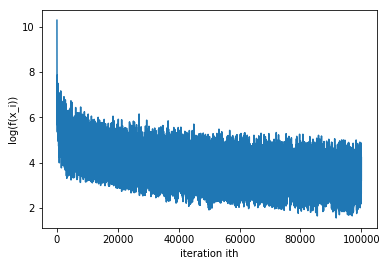

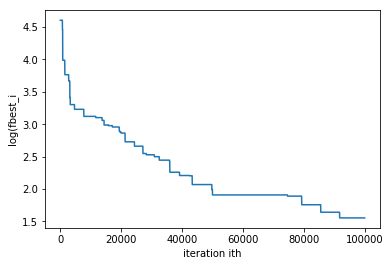

In [35]:
start = timer()
(wstobest,stogdm,value, fbest)=storegress(X,Y)
end = timer()
print('time=',end - start)
#print('x=',x)
print('value=',value)
print('fbest=',fbest)
import matplotlib.pyplot as plt
plt.plot(np.log(value))
plt.xlabel('iteration ith')
plt.ylabel('log(f(x_i))')
plt.show()
plt.plot(np.log(fbest))
plt.xlabel('iteration ith')
plt.ylabel('log(fbest_i')
plt.show()

## Model testing

In [36]:
B=np.transpose(data[1:])[500:-1]
(n,m)=B.shape
print(B.shape)
C=np.transpose(data[0])[500:-1]
Test=[[0 for x in range(m+1)] for y in range(n)]
Xtest=np.array(Test)
for i in range(n):
    for j in range(m):
        Xtest[i][j]=B[i][j]
for i in range(n):
    Xtest[i][m]=1
#prettyP(Xtest)

(267, 8)


In [37]:
y1=np.matmul(Xtest,gdm)
y2=np.matmul(Xtest,wstobest)
for i in range(n):
    if y1[i]>0:
        y1[i]=1
    else:
        y1[i]=-1
for i in range(n):
    if y2[i]>0:
        y2[i]=1
    else:
        y2[i]=-1
print(y1)
print(y2)
count1=0
for i in range(n):
    if y1[i]==C[i]:
        count1+=1
eff1=count1/n
count2=0
for i in range(n):
    if y2[i]==C[i]:
        count2+=1
eff2=count2/n
print('efficiency1=',eff1)
print('efficiency2=',eff2)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1